In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Ensure the file is not open in another program before running this code
try:
	df = pd.read_excel("ps.xlsx")
	df
except PermissionError as e:
	print(f"PermissionError: {e}. Please ensure the file is not open in another program.")

Analisi livello d'accesso

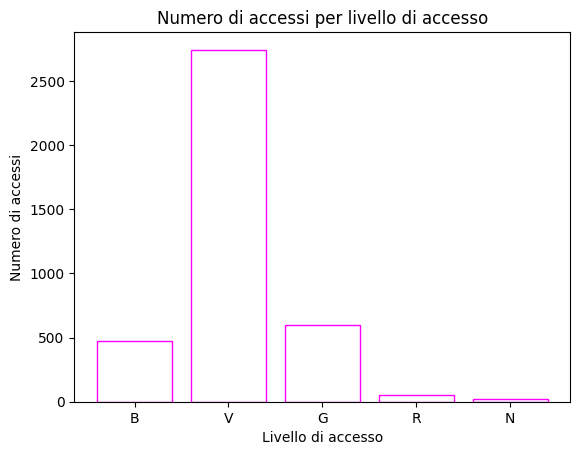

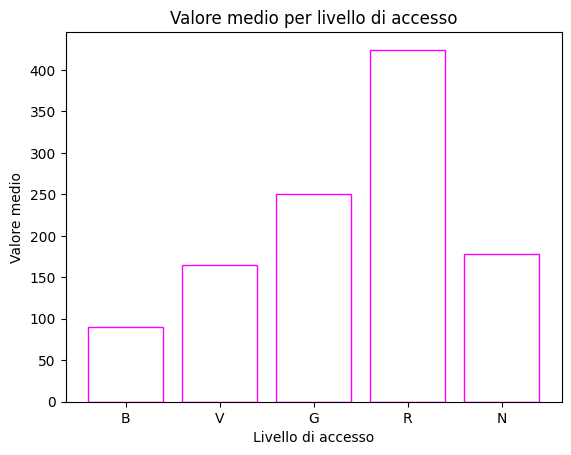

C:\Users\EdoardoBuono\AppData\Local\Temp\ipykernel_23532\1252670934.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='livello_accesso', y='valore', data=df, palette='Set2')


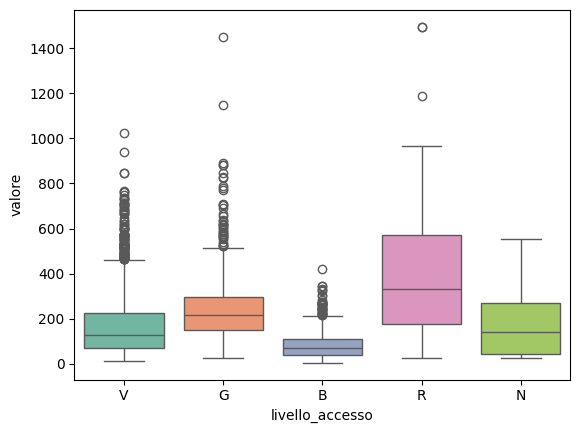

C:\Users\EdoardoBuono\AppData\Local\Temp\ipykernel_23532\1252670934.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='livello_accesso', y='valore', data=df, palette=colors, order=livello_accesso)


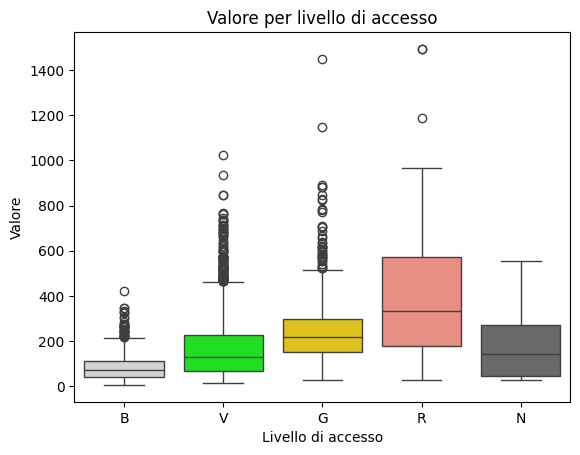

In [5]:
livello_accesso = ['B', 'V', 'G', 'R', 'N']
conteggio_livello_accesso = [df['livello_accesso'].value_counts()[i] if i in df['livello_accesso'].value_counts() else 0 for i in livello_accesso]

plt.bar(livello_accesso, conteggio_livello_accesso, color='w', edgecolor='magenta')
plt.xlabel('Livello di accesso')
plt.ylabel('Numero di accessi')
plt.title('Numero di accessi per livello di accesso')
plt.show()

valore_medio_livello_accesso =[df[df['livello_accesso'] == i]['valore'].mean() if i in df['livello_accesso'].value_counts() else 0 for i in livello_accesso]
plt.bar(livello_accesso, valore_medio_livello_accesso, color='w', edgecolor='magenta')
plt.xlabel('Livello di accesso')
plt.ylabel('Valore medio')
plt.title('Valore medio per livello di accesso')
plt.show()

sns.boxplot(x='livello_accesso', y='valore', data=df, palette='Set2')
plt.show()

#fai un boxplot con livello di accesso ordinato ['B', 'V', 'G', 'R', 'N'] e i colori della lista colors
colors=['lightgrey','lime','gold','salmon','dimgrey']
sns.boxplot(x='livello_accesso', y='valore', data=df, palette=colors, order=livello_accesso)
plt.xlabel('Livello di accesso')
plt.ylabel('Valore')
plt.title('Valore per livello di accesso')
plt.show()

Analisi problematica principale


In [6]:
problematica_principale = {
    1: "Coma",
    2: "Sindrome neurologica acuta",
    3: "Altri sintomi sistema nervoso",
    4: "Dolore addominale",
    5: "Dolore toracico",
    6: "Dispnea",
    7: "Dolore precordiale",
    8: "Shock",
    9: "Emorragia non traumatica",
    10: "Trauma",
    12: "Febbre",
    13: "Reazione allergica",
    14: "Alterazioni del ritmo",
    15: "Ipertensione arteriosa",
    16: "Stato di agitazione psicomotoria",
    17: "Sintomi o disturbi oculistici",
    18: "Sintomi o disturbi otorinolaringoiatrici",
    19: "Sintomi o disturbi ostetrico-ginecologici",
    20: "Sintomi o disturbi dermatologici",
    22: "Sintomi o disturbi urologici",
    23: "Altri sintomi o disturbi",
    24: "Accertamenti medico legal",
    26: "Caduta da altezza inferiore o uguale alla statura del soggetto",
    28: "Psichiatrico",
    29: "Pneumologia/ Patologia Respiratoria",
    30: "Violenza Altrui",
    31: "Autolesionismo"
}

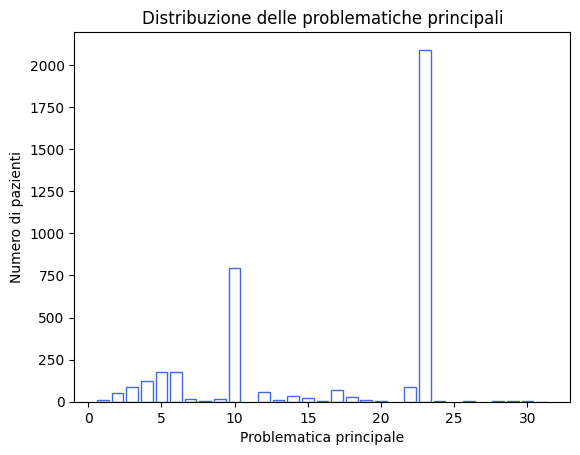

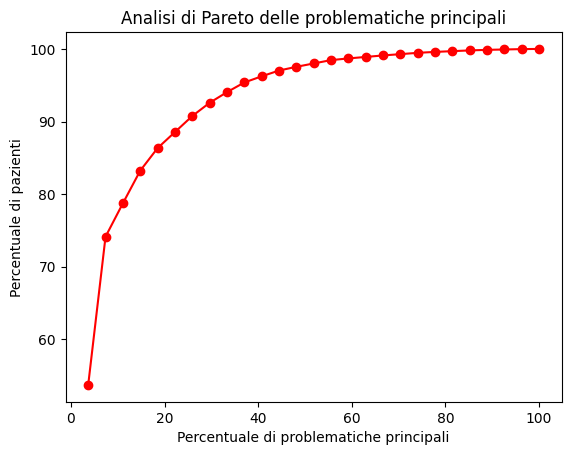

In [7]:
prob_principale_keys = list(problematica_principale.keys())

prob_principale_keys=list(problematica_principale.keys())
prob_principale_count=[df['prob_principale'].value_counts().get(i, 0) for i in prob_principale_keys]
 
plt.bar(prob_principale_keys, prob_principale_count, color='w', edgecolor='royalblue')
plt.xlabel('Problematica principale')
plt.ylabel('Numero di pazienti')
plt.title('Distribuzione delle problematiche principali')
plt.show()

# fai un analisi di pareto per i problemi principali
df_pareto = pd.DataFrame({'problematica_principale': prob_principale_keys, 'conteggio': prob_principale_count})
df_pareto = df_pareto.sort_values(by='conteggio', ascending=False)

df_pareto= df_pareto.reset_index(drop=True)
df_pareto['index_pct']=(df_pareto.index+1)/len(df_pareto)*100

df_pareto['cumsum'] = df_pareto['conteggio'].cumsum()
df_pareto['cumsum_pct'] = df_pareto['cumsum']/df_pareto['conteggio'].sum()*100

df_pareto

plt.plot(df_pareto['index_pct'], df_pareto['cumsum_pct'], marker='o', color='r')
plt.xlabel('Percentuale di problematiche principali')
plt.ylabel('Percentuale di pazienti')
plt.title('Analisi di Pareto delle problematiche principali')
plt.show()

Approfondimento prob_principali 10 e 23

# accessi per Altri sintomi o disturbi: 2091


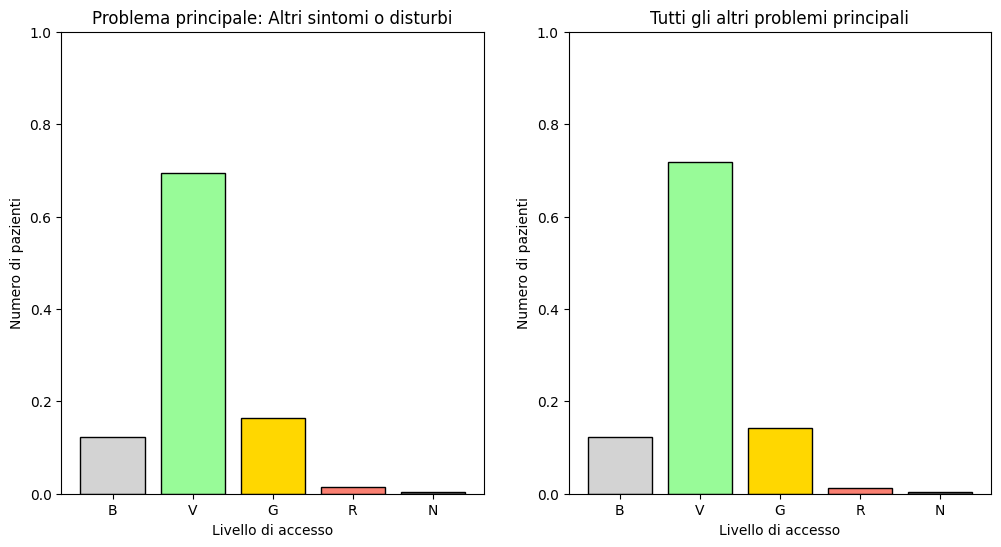

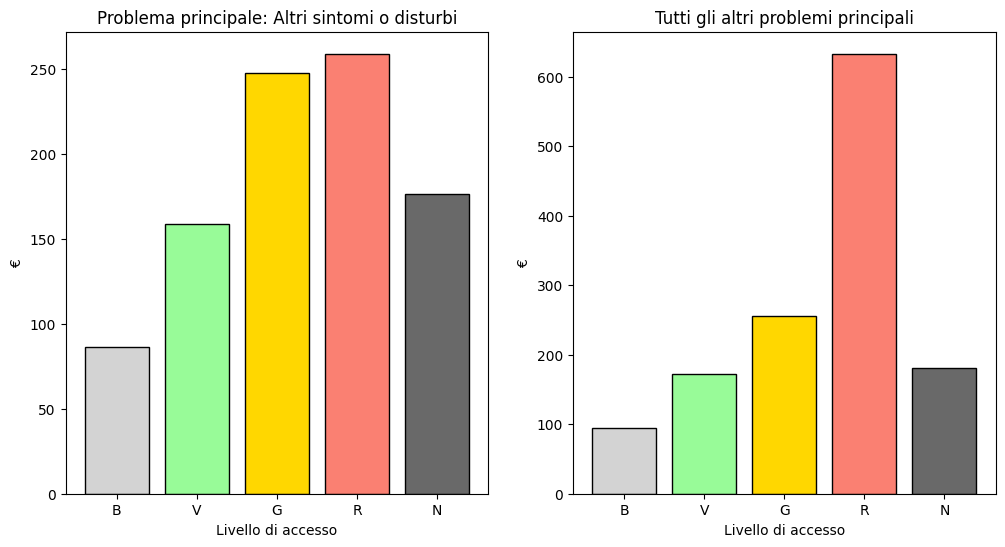

# accessi per Trauma: 795


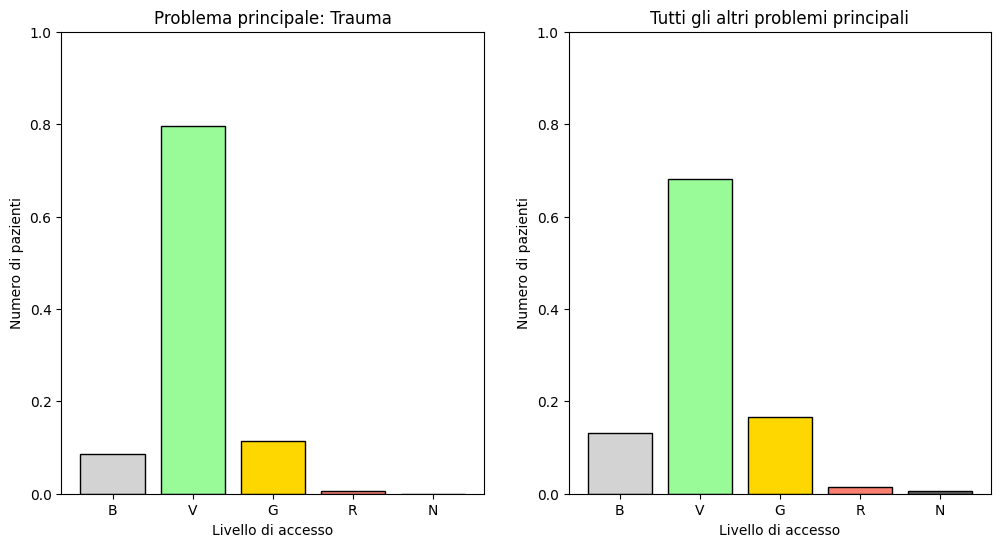

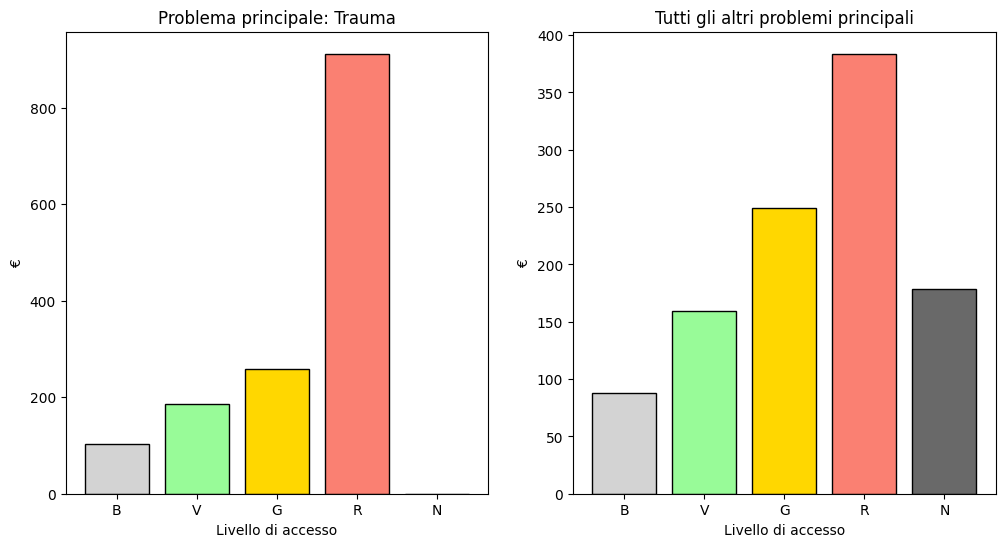

In [8]:
def analysis_prob_principale(df, pp):
 
    df_filt = df[df['prob_principale'] == pp]
    df_no_filt = df[df['prob_principale'] != pp]
    livello_accesso = ['B','V','G','R','N']
    colors = ['lightgrey', 'palegreen', 'gold', 'salmon', 'dimgrey']
    
    ######## CONTEGGIO OCCORRENZE ########
 
    numero_accessi_livello_filt = [df_filt[df_filt['livello_accesso'] == i].shape[0] for i in livello_accesso]
    numero_accessi_livello = [df_no_filt[df_no_filt['livello_accesso'] == i].shape[0] for i in livello_accesso]
 
    print(f'# accessi per {problematica_principale[pp]}: {sum(numero_accessi_livello_filt)}')
 
    freq_rel_livello_filt = np.array(numero_accessi_livello_filt) / sum(numero_accessi_livello_filt)
    freq_rel_livello = np.array(numero_accessi_livello) / sum(numero_accessi_livello)
 
    fig, ax = plt.subplots(1, 2, figsize = (12, 6))
    ax[0].bar(livello_accesso, freq_rel_livello_filt, color = colors, edgecolor = 'k')
    ax[0].set_xlabel('Livello di accesso')
    ax[0].set_ylabel('Numero di pazienti')
    ax[0].set_ylim(0, 1)
    ax[0].set_title(f'Problema principale: {problematica_principale[pp]}')
 
    ax[1].bar(livello_accesso, freq_rel_livello, color = colors, edgecolor = 'k')
    ax[1].set_xlabel('Livello di accesso')
    ax[1].set_ylabel('Numero di pazienti')
    ax[1].set_ylim(0, 1)
    ax[1].set_title('Tutti gli altri problemi principali')
 
    plt.show()
 
    ######## COSTO MEDIO ########
 
    costo_medio_livello_filt = [df_filt[df_filt['livello_accesso'] == i]['valore'].mean() for i in livello_accesso]
    costo_medio_livello = [df_no_filt[df_no_filt['livello_accesso'] == i]['valore'].mean() for i in livello_accesso]
    
    costo_medio_livello_filt = [0 if np.isnan(i) else i for i in costo_medio_livello_filt]
    costo_medio_livello = [0 if np.isnan(i) else i for i in costo_medio_livello]
 
    fig, ax = plt.subplots(1, 2, figsize = (12, 6))
    ax[0].bar(livello_accesso, costo_medio_livello_filt, color = colors, edgecolor = 'k')
    ax[0].set_xlabel('Livello di accesso')
    ax[0].set_ylabel('€')
    ax[0].set_title(f'Problema principale: {problematica_principale[pp]}')
 
    ax[1].bar(livello_accesso, costo_medio_livello, color = colors, edgecolor = 'k')
    ax[1].set_xlabel('Livello di accesso')
    ax[1].set_ylabel('€')
    ax[1].set_title('Tutti gli altri problemi principali')
 
    plt.show()
    
analysis_prob_principale(df,23)
analysis_prob_principale(df,10)